## EDA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_selection import mutual_info_regression

In [25]:
data = pd.read_csv("merged_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume,DXY_Close,Gold_Close,Crude_Oil_Price,SP500,Treasury_Yield
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,84.699997,1234.400024,94.419998,2001.569946,2.600
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,84.320000,1225.699951,93.070000,2011.359985,2.629
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,84.800003,1215.300049,92.410004,2010.400024,2.587
3,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,84.669998,1216.800049,91.519997,1994.290039,2.566
4,2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,84.660004,1221.000000,91.559998,1982.770020,2.535


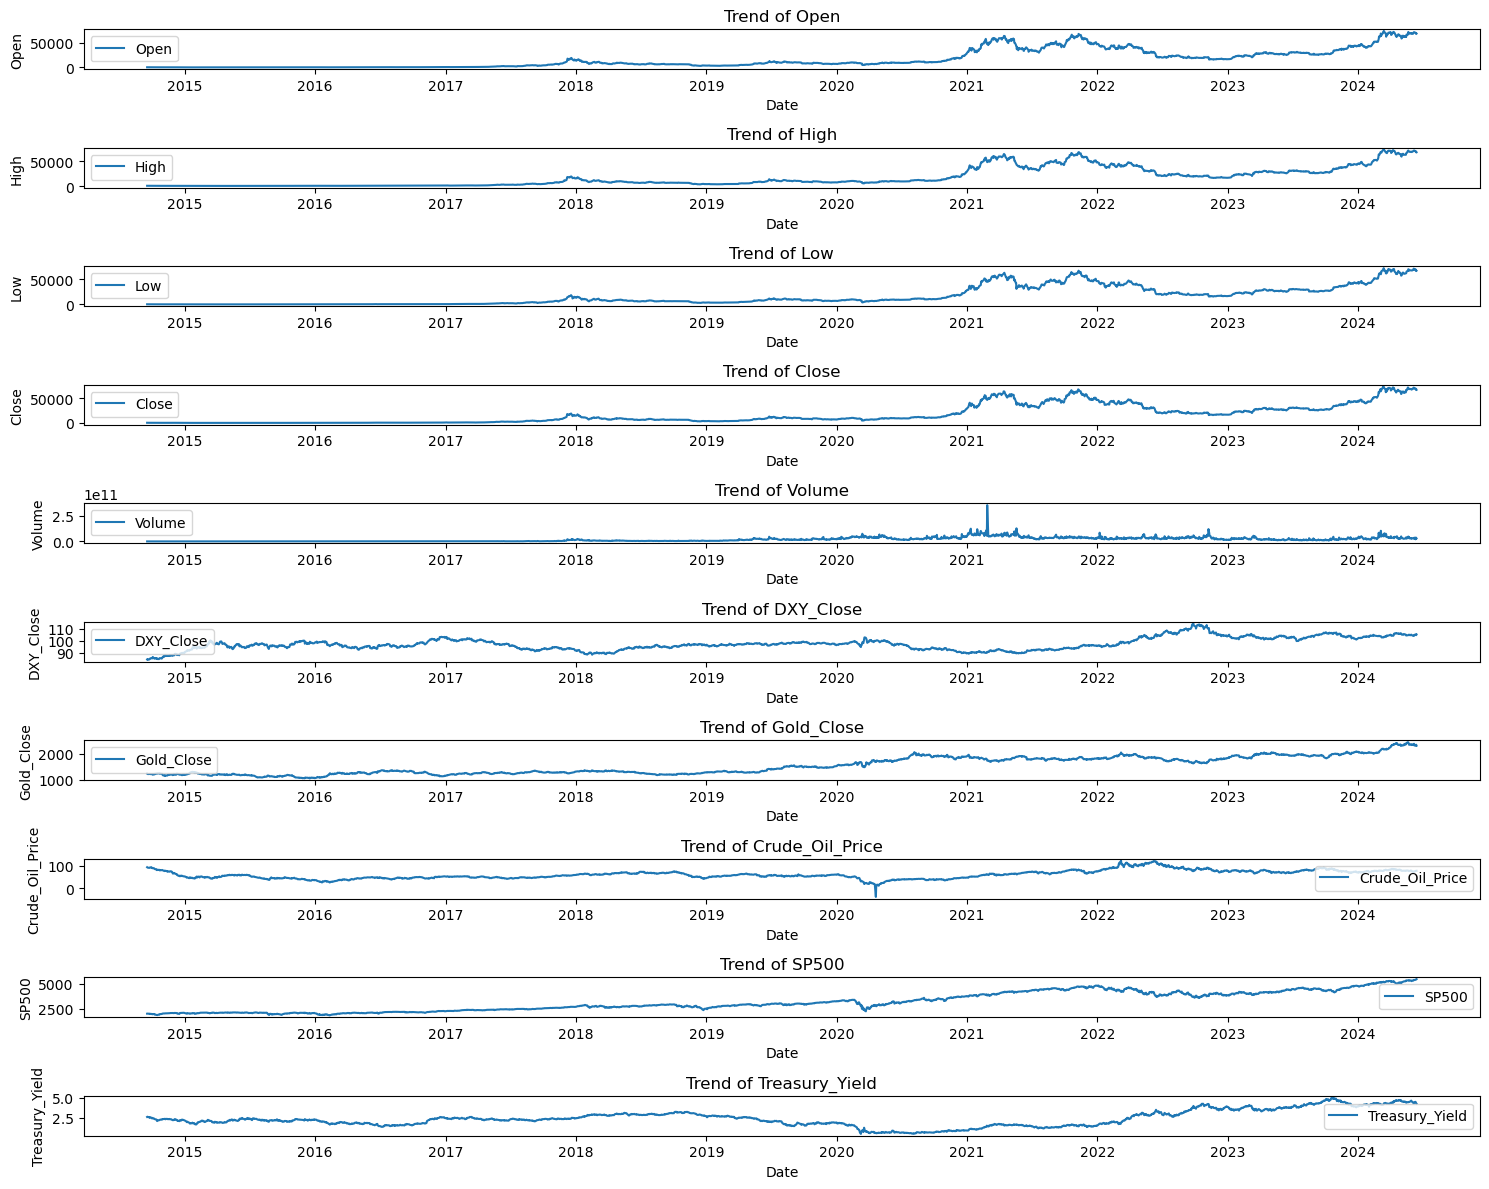

,Open,High,Low,Close,Volume,DXY_Close,Gold_Close,Crude_Oil_Price,SP500,Treasury_Yield
count,2449.000000,2449.000000,2449.000000,2449.000000,2.449000e+03,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000
mean,16669.737321,17093.188108,16213.314875,16684.262406,1.858208e+10,97.400882,1537.975377,61.776362,3184.084778,2.380163
std,18570.224782,19048.129029,18034.863673,18574.704173,2.047823e+10,5.056399,328.011503,18.404105,957.642694,0.989669
min,176.897003,215.240997,171.509995,178.102997,7.845880e+06,84.320000,1050.800049,-37.630001,1829.079956,0.499000
25%,1046.079956,1074.920044,1028.160034,1049.140015,2.639000e+08,93.959999,1246.900024,48.330002,2343.979980,1.708000
50%,8805.387695,8985.919922,8612.095703,8815.662109,1.480566e+10,96.860001,1445.599976,59.130001,2905.030029,2.264000
75%,27514.873047,28037.925781,27039.265625,27429.978516,3.055876e+10,100.559998,1829.900024,74.220001,4090.379883,2.917000
max,73079.375000,73750.070312,71334.093750,73083.500000,3.509679e+11,114.110001,2433.899902,123.699997,5433.740234,4.988000


In [3]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as the index
data.set_index('Date', inplace=True)

# Summary statistics
summary_stats = data.describe()

# Plotting the trends for all columns
plt.figure(figsize=(15, 12))
for i, column in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i)
    plt.plot(data.index, data[column], label=column)
    plt.title(f'Trend of {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

summary_stats

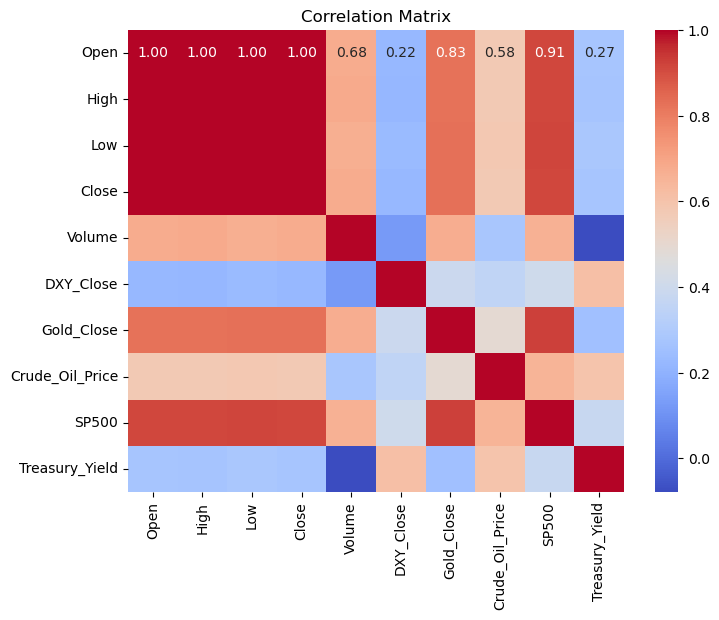

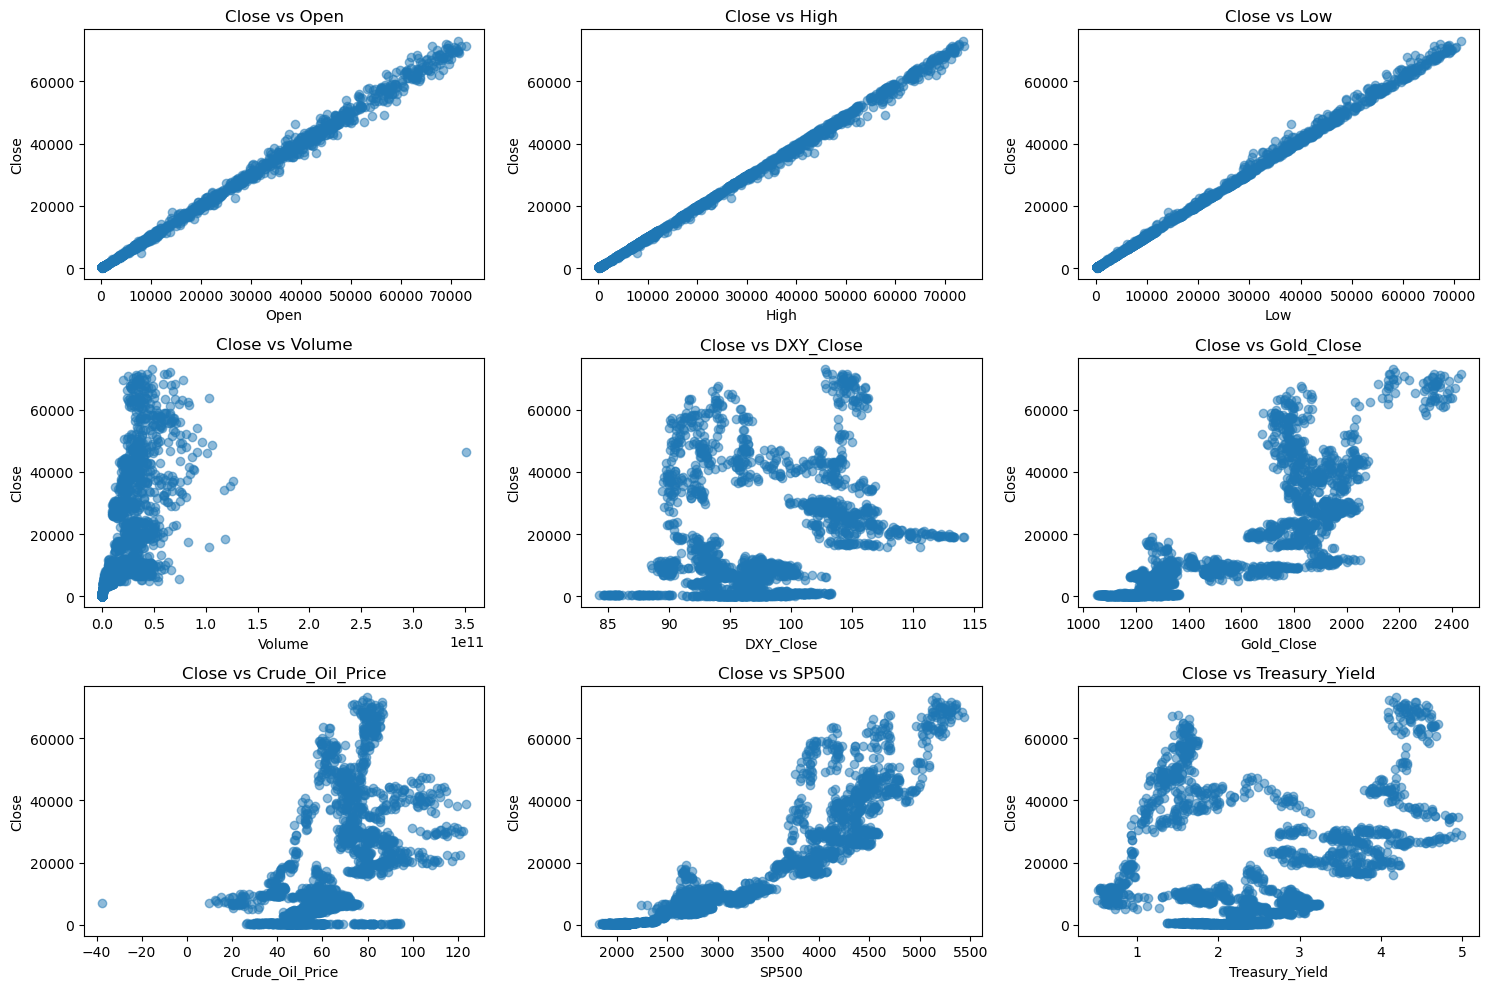

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


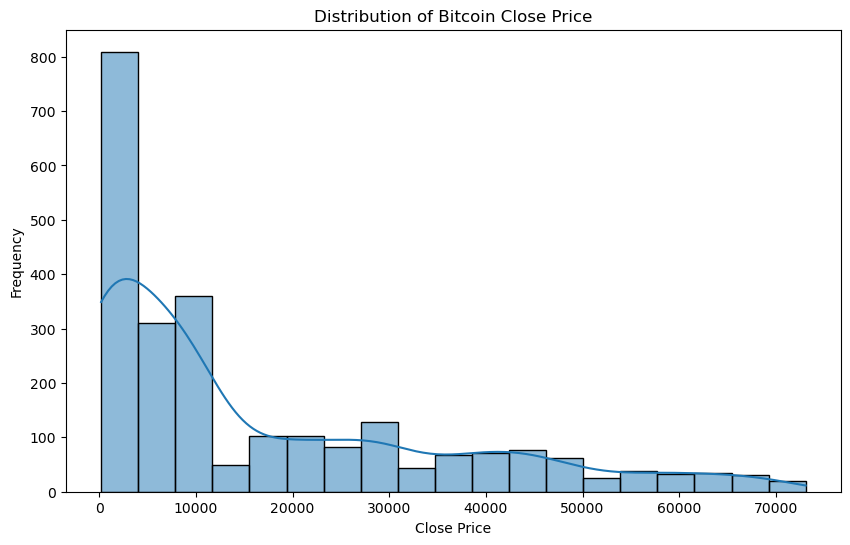

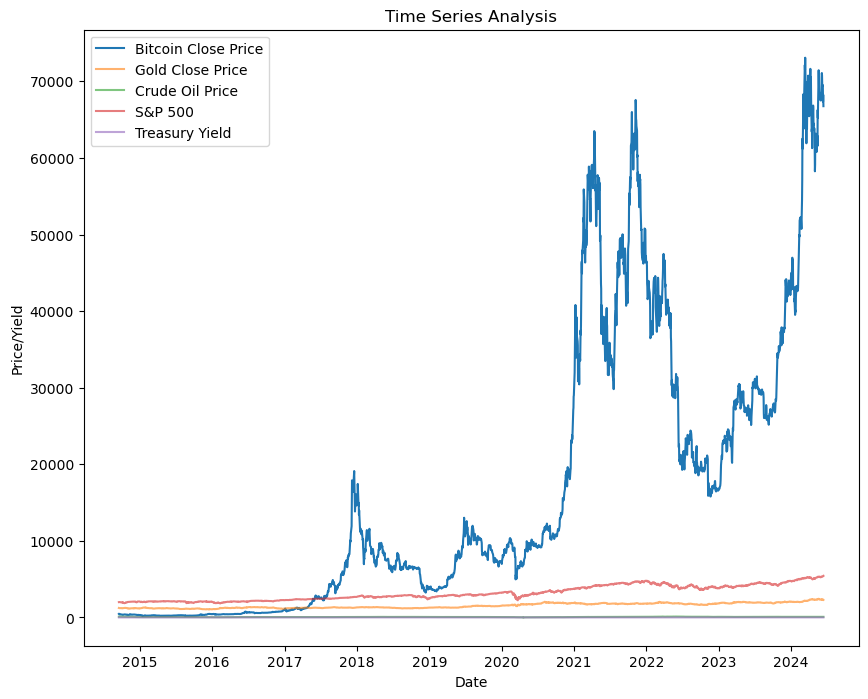

In [4]:
# Correlation analysis
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot to visualize relationship between Bitcoin Close price and other features
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns.drop('Close'), 1):
    plt.subplot(3, 3, i)
    plt.scatter(data[column], data['Close'], alpha=0.5)
    plt.title(f'Close vs {column}')
    plt.xlabel(column)
    plt.ylabel('Close')

plt.tight_layout()
plt.show()

# Distribution of Bitcoin Close price
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Bitcoin Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Time series analysis for Close price and other relevant features
plt.figure(figsize=(10, 8))
plt.plot(data.index, data['Close'], label='Bitcoin Close Price')
plt.plot(data.index, data['Gold_Close'], label='Gold Close Price', alpha=0.6)
plt.plot(data.index, data['Crude_Oil_Price'], label='Crude Oil Price', alpha=0.6)
plt.plot(data.index, data['SP500'], label='S&P 500', alpha=0.6)
plt.plot(data.index, data['Treasury_Yield'], label='Treasury Yield', alpha=0.6)
plt.legend()
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Price/Yield')
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


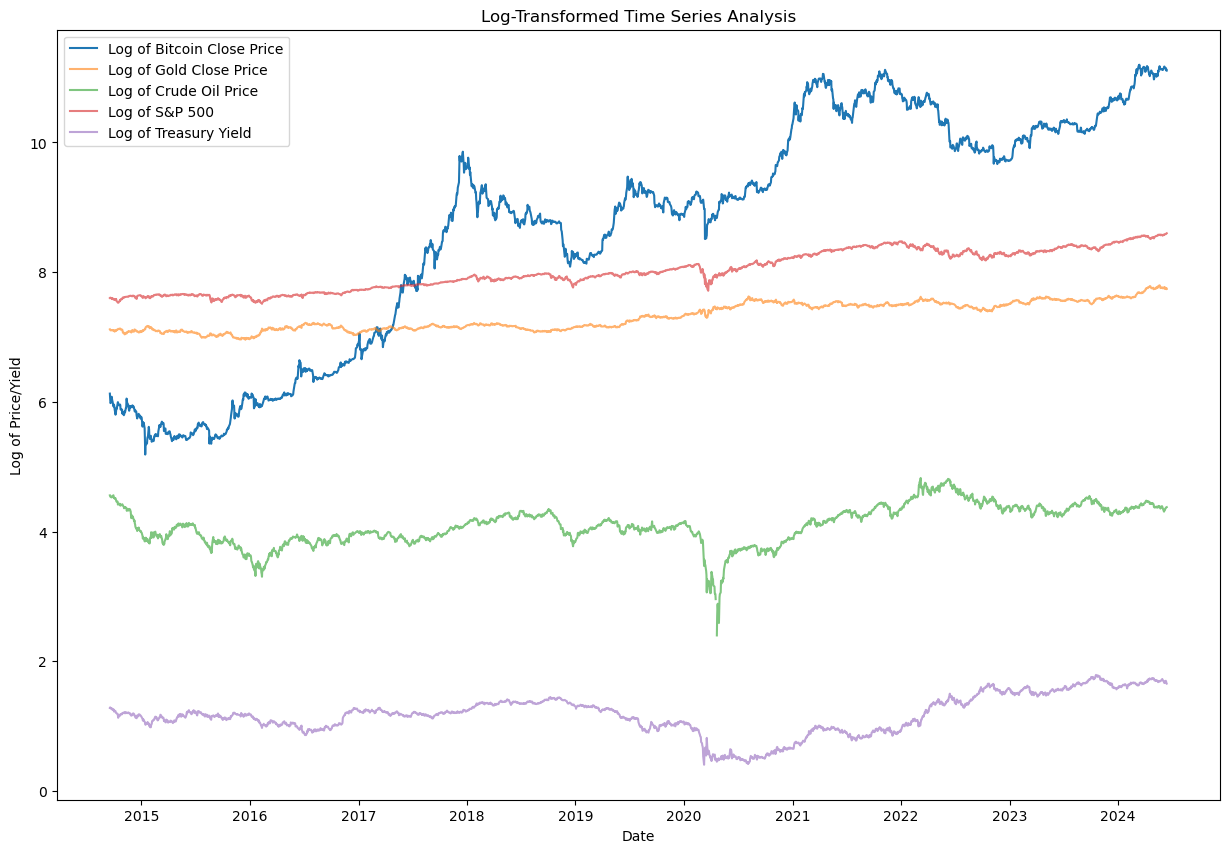

In [5]:
# Applying log transformation to the relevant columns
log_data = data[['Close', 'Gold_Close', 'Crude_Oil_Price', 'SP500', 'Treasury_Yield']].apply(lambda x: np.log1p(x))

# Time series analysis for log-transformed Close price and other relevant features
plt.figure(figsize=(15, 10))
plt.plot(log_data.index, log_data['Close'], label='Log of Bitcoin Close Price')
plt.plot(log_data.index, log_data['Gold_Close'], label='Log of Gold Close Price', alpha=0.6)
plt.plot(log_data.index, log_data['Crude_Oil_Price'], label='Log of Crude Oil Price', alpha=0.6)
plt.plot(log_data.index, log_data['SP500'], label='Log of S&P 500', alpha=0.6)
plt.plot(log_data.index, log_data['Treasury_Yield'], label='Log of Treasury Yield', alpha=0.6)
plt.legend()
plt.title('Log-Transformed Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Log of Price/Yield')
plt.show()

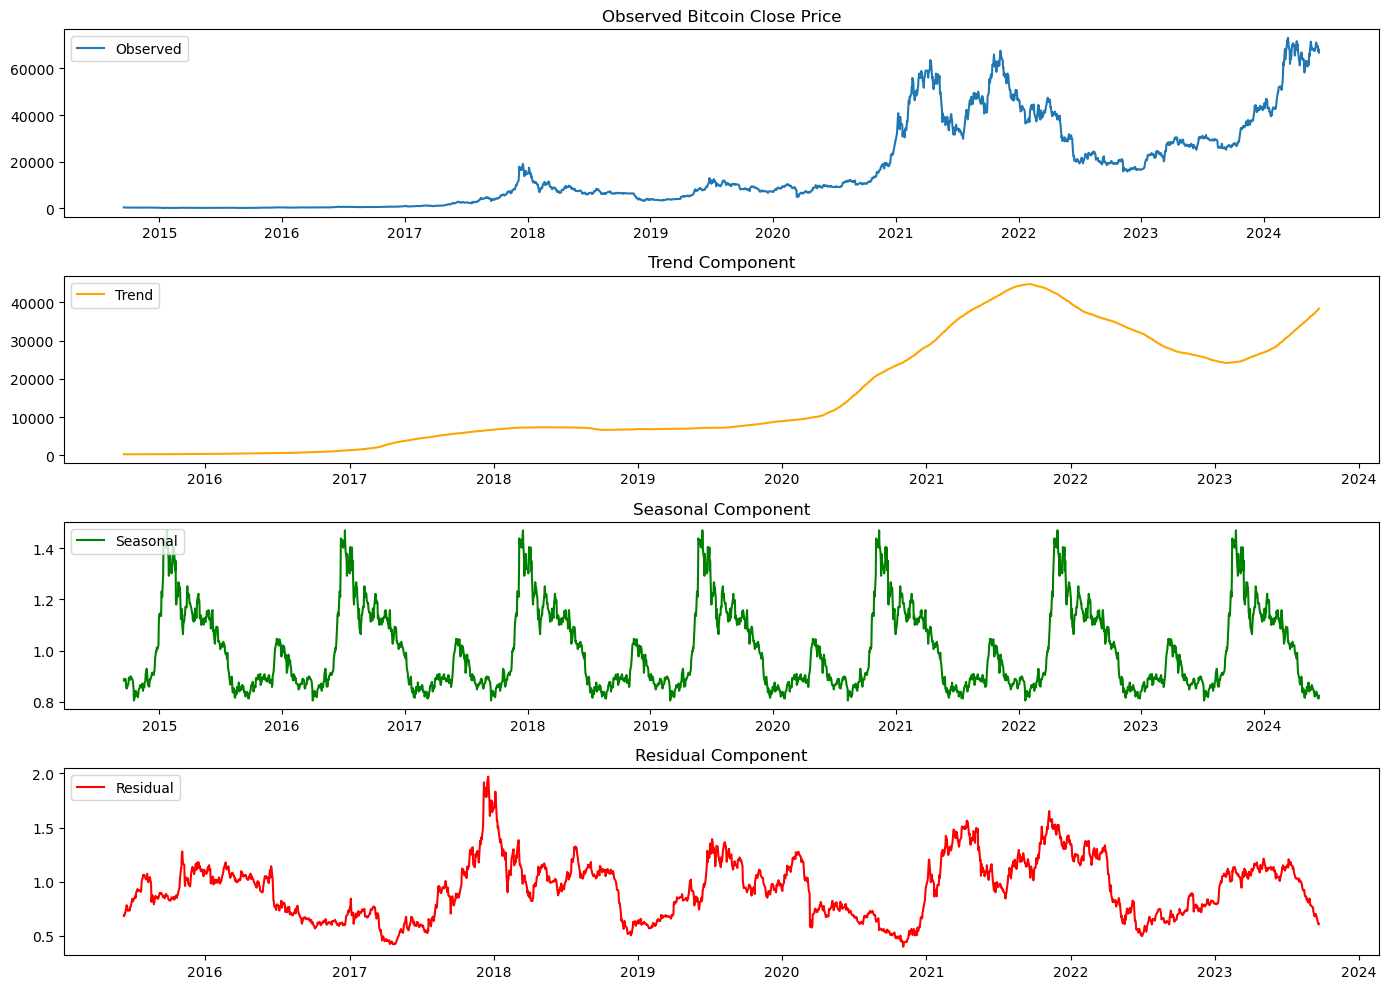

In [6]:
# Decomposing the original Bitcoin Close price
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)  # Assuming daily data with yearly seasonality

# Plotting the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Bitcoin Close Price')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


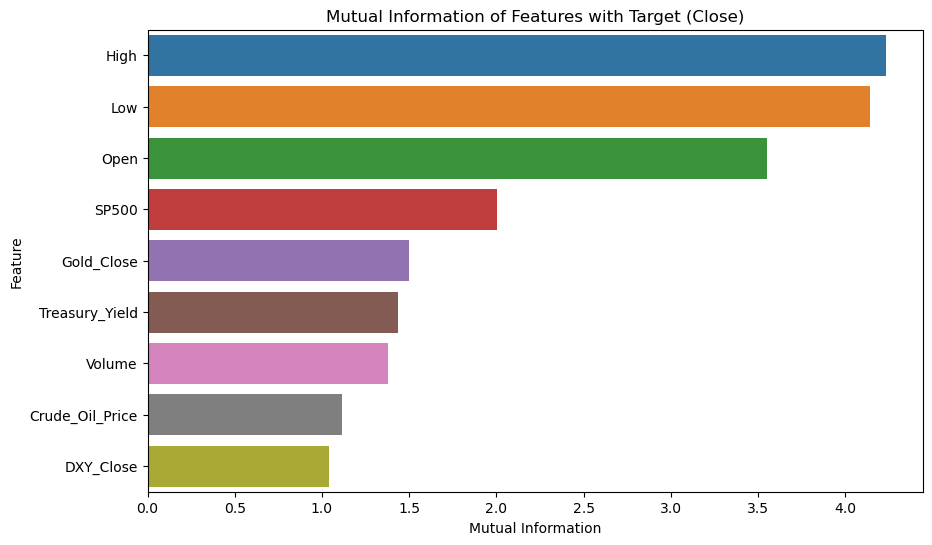

In [37]:
numeric_data = data.select_dtypes(include=[np.number])

# Ensure 'Close' is the target variable
features = numeric_data.drop('Close', axis=1)
target = numeric_data['Close']

# Calculate mutual information between features and the target variable
mi = mutual_info_regression(features, target)

# Create a DataFrame to visualize the mutual information
mi_df = pd.DataFrame({
    'Feature': features.columns,
    'Mutual Information': mi
})

# Sort the DataFrame by mutual information
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the mutual information
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information of Features with Target (Close)')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()